## Downloading files

In [ ]:
# Download noisy student EfficientNet B0
!wget "https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b0.tar.gz" -P "/content/drive/My Drive/ADL/"
# Extract Tar file
!tar -xf "/content/drive/My Drive/ADL/noisy_student_efficientnet-b0.tar.gz" -C "/content/drive/My Drive/ADL/"

--2021-04-08 16:27:34--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156406658 (149M) [application/x-tar]
Saving to: ‘/content/drive/My Drive/ADL/noisy_student_efficientnet-b0.tar.gz’

noisy_student_effic 100%[===================>] 149.16M  41.8MB/s    in 3.7s    

2021-04-08 16:27:38 (40.7 MB/s) - ‘/content/drive/My Drive/ADL/noisy_student_efficientnet-b0.tar.gz’ saved [156406658/156406658]



In [ ]:
# Change ckpt weights file to h5 weights file
# this file is downloaded from tensorflow source code: efficientnet_weight_update_util.py
!python "/content/drive/My Drive/ADL/efficientnet_weight_update_util.py" --model b0 --notop --ckpt "/content/drive/My Drive/ADL/noisy_student_efficientnet-b0/model.ckpt" --o "/content/drive/My Drive/ADL/efficientnetb0_notop.h5"

2021-04-08 16:29:09.088678: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-08 16:29:12.811155: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-08 16:29:12.830474: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-08 16:29:12.842952: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-08 16:29:12.843092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6de85112efb): /proc/driver/nvidia/version does not exist
2021-04-08 16:29:12.844290: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
check variables match in each block
blocks_0 and block1a match.
blocks_1 and

In [ ]:
# Download train dataset
!wget "http://imagenet.stanford.edu/internal/car196/cars_train.tgz" -P "/content/drive/My Drive/ADL/cars_train.tgz"
# Extract Tar file
!tar -xf "/content/drive/My Drive/ADL/cars_train.tgz/cars_train.tgz" -C "/content/drive/My Drive/ADL/"

--2021-04-08 15:46:40--  http://imagenet.stanford.edu/internal/car196/cars_train.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘/content/drive/My Drive/ADL/cars_train.tgz/cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  2.67MB/s    in 18m 17s 

2021-04-08 16:04:58 (872 KB/s) - ‘/content/drive/My Drive/ADL/cars_train.tgz/cars_train.tgz’ saved [979269282/979269282]



In [ ]:
# Download test dataset
!wget "http://imagenet.stanford.edu/internal/car196/cars_test.tgz" -P "/content/drive/My Drive/ADL/cars_test.tgz"
# Extract Tar file
!tar -xf "/content/drive/My Drive/ADL/cars_test.tgz/cars_test.tgz" -C "/content/drive/My Drive/ADL/"

--2021-04-08 16:10:05--  http://imagenet.stanford.edu/internal/car196/cars_test.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘/content/drive/My Drive/ADL/cars_test.tgz/cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  1.56MB/s    in 11m 55s 

2021-04-08 16:22:01 (1.30 MB/s) - ‘/content/drive/My Drive/ADL/cars_test.tgz/cars_test.tgz’ saved [977350468/977350468]



In [ ]:
# Download dataset
!wget "http://imagenet.stanford.edu/internal/car196/car_ims.tgz" -P "/content/drive/My Drive/ADL/"
# Extract Tar file
!tar -xf "/content/drive/My Drive/ADL/car_ims.tgz" -C "/content/drive/My Drive/ADL/"

In [ ]:
# Download labels
!wget "http://imagenet.stanford.edu/internal/car196/cars_annos.mat" -P "/content/drive/My Drive/ADL/"

--2021-04-09 09:04:01--  http://imagenet.stanford.edu/internal/car196/cars_annos.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘/content/drive/My Drive/ADL/cars_annos.mat’

cars_annos.mat      100%[===================>] 385.23K   162KB/s    in 2.4s    

2021-04-09 09:04:04 (162 KB/s) - ‘/content/drive/My Drive/ADL/cars_annos.mat’ saved [394471/394471]



## Import Stuff

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input, GlobalAveragePooling2D, BatchNormalization
from keras import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
import functools
from datetime import datetime
from keras.metrics import top_k_categorical_accuracy
import tensorflow as tf
from keras.models import load_model
import os

## Define Transfer Learning Class

Every step is done in this class!

In [ ]:
class transfer_learning():

  height, width = 160, 160
  batch_size = 32
  num_classes = 196
  nb_epochs = 25
  effnet_weights_dir = "/content/drive/My Drive/ADL/efficientnetb0_notop.h5"
  model_weights_dir = './drive/MyDrive/ADL/im_model.h5'

  results_dir = './drive/MyDrive/ADL/'

  def __init__(self):
    # Add Metric: Top-3-Accuracy
    self.top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
    self.top3_acc.__name__ = 'top3_acc'
    self.dependencies = {'top3_acc': self.top3_acc}
    self.learning_rate = 0.001
    self.train_ds = []
    self.test_ds = []
    self.im_model = []

  def prepare_dataset(self):
    # Load dataset
    ds, ds_info = tfds.load(name='cars196', as_supervised=True, with_info=True)
    self.train_ds = ds['train']
    self.test_ds = ds['test']

    # Resize dataset
    self.train_ds = self.train_ds.map(lambda x, y: (tf.image.resize(x, (self.height, self.width)), y))
    self.train_ds = self.train_ds.map(self.one_hot)
    self.test_ds = self.test_ds.map(lambda x, y: (tf.image.resize(x, (self.height, self.width)), y))
    self.test_ds = self.test_ds.map(self.one_hot)

    print("Dataset loaded: ")
    print(self.train_ds, self.test_ds)

    # Cache so our images are ready before passing to model
    self.train_ds = self.train_ds.cache().map(self.augment_func).shuffle(100).batch(self.batch_size).prefetch(buffer_size=10) 
    self.test_ds = self.test_ds.cache().map(self.augment_func).batch(self.batch_size).prefetch(buffer_size=10)

    # Normalizing the datasets' values
    #train_ds = train_ds.map(lambda x,y: (x / 255,y))
    #test_ds = test_ds.map(lambda x,y: (x / 255,y))

    # Plot some images
    plt.figure(figsize=(10, 20))
    for i, (image_batch, label) in enumerate(self.train_ds.take(15)):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(image_batch[1].numpy().astype(np.int32)) 
        #plt.title(label[3].numpy())
        plt.axis("off")
    plt.savefig(os.path.join(self.results_dir, 'dataset.png'))
    plt.show();



  # One-hot encoder for labels
  def one_hot(self, image, label):
      # Cast to Int and perform one-hot op
      label = tf.one_hot(tf.cast(label, tf.int32), self.num_classes)
      # Recast to Float32
      label = tf.cast(label, tf.float32)
      return image, label


  # Augmentation
  def augment_func(self, image,label):
      image = tf.image.resize_with_crop_or_pad(image,self.height+6,self.width+6)
      image = tf.image.random_crop(image,size=[self.height,self.width,3])
      image = tf.image.random_flip_left_right(image) 
      image = tf.image.random_hue(image,0.2) 
      image = tf.image.random_contrast(image,0.5,2)
      image = tf.image.random_saturation(image,0,2)
      return image, label


  def train(self, training_mode = 'freeze_all_layers'):

    # Add callbacks
    callbacks = []

    # Choose Transfer Learning policy
    if training_mode == 'freeze_all_layers':
      checkpoint_callback = self.prepare_freeze_all_layers()
      callbacks = [checkpoint_callback]
      learning_rate = 0.005

    elif training_mode == 'full_finetune':
      self.prepare_full_finetune()
      print(" Accuracy on test data so far is : ")
      self.im_model.evaluate(self.test_ds, verbose=1)
      learning_rate = 0.0005

    elif training_mode == '6and7_finetune':
      self.prepare_67_finetune()
      print(" Accuracy on test data so far is : ")
      self.im_model.evaluate(self.test_ds, verbose=1)
      learning_rate = 0.0005

    # Compile model
    self.im_model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy', self.top3_acc])
      

    # Actual Training
    start = datetime.now()

    history = self.im_model.fit(
        self.train_ds,
        validation_data = self.test_ds,
        callbacks = callbacks,
        epochs = self.nb_epochs)
    
    duration = datetime.now() - start
    print("Training completed in time: ", duration)

    # Plot results
    self.plot_results(history, training_mode)


  def prepare_full_finetune(self):
      # Load model 
      self.im_model = load_model(self.model_weights_dir, custom_objects = self.dependencies)

      # Unfreeze all layers
      for layer in self.im_model.layers:
        layer.trainable = True


  def prepare_67_finetune(self):
      # Load model 
      self.im_model = load_model(self.model_weights_dir, custom_objects = self.dependencies)

      # freeze layers till block 6 
      lt = False
      for layer in self.im_model.layers:
        if 'block6a' in layer.name: 
          lt = True
        layer.trainable = lt


  def prepare_freeze_all_layers(self):
      # Load efficientnet
      effnet = EfficientNetB0(weights = self.effnet_weights_dir, include_top=False)

      # Freeze all layers
      for layer in effnet.layers:
        layer.trainable = False

      # add model layers
      x = GlobalAveragePooling2D()(effnet.output)
      x = Dense(1024, activation='relu')(x)
      x = BatchNormalization()(x)
      x = Dropout(0.2)(x)
      pred = Dense(self.num_classes, activation='softmax')(x)

      self.im_model = Model(effnet.input, pred)
      
      print(self.im_model.summary())

      # Add callback: Save model (We will finetune on these weights in other policies)
      txt_checkpoint = ModelCheckpoint(filepath= self.model_weights_dir, 
                            verbose=1, save_best_only=True) 

      return txt_checkpoint


  def plot_results(self, history, training_mode):
    plt.figure(figsize = (10, 5))
    # summarize history for top3 accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['top3_acc'])
    plt.plot(history.history['val_top3_acc'])
    plt.title('Top 3 accuracy')
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # summarize history for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Top 1 accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.savefig(os.path.join(self.results_dir, training_mode))
    plt.show()

## Create Class and prepare dataset
dataset is downloaded, resized, augmented, and plotted in prepare_dataset() function!

Dataset loaded: 
<MapDataset shapes: ((160, 160, 3), (196,)), types: (tf.float32, tf.float32)> <MapDataset shapes: ((160, 160, 3), (196,)), types: (tf.float32, tf.float32)>


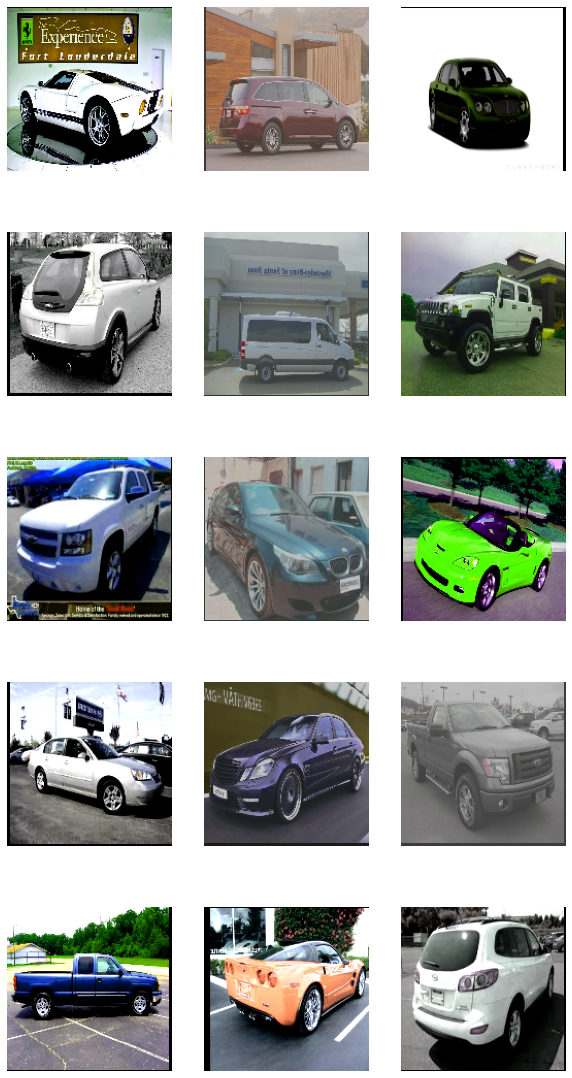

In [ ]:
transfer_model = transfer_learning()
transfer_model.prepare_dataset()

## Step 1: Transfer Learning with frozen weights of EfficientNetB0
In this function, when mode is 'freeze_all_layers', the model is created from scratch, efficientnet weights are loaded, and training begins.

this function outputs network architecture, training process, time of completion, and plots the training and validation results :) 

at the end of training, model is saved for next steps

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
______________________________________________________________________________________________

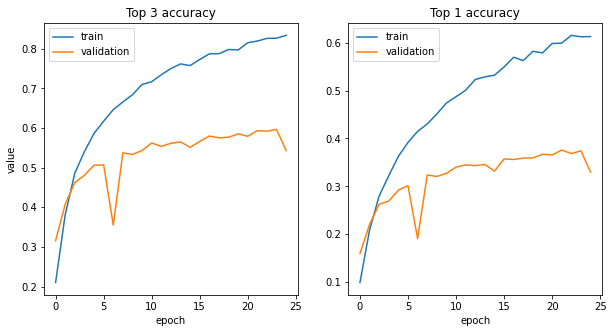

In [ ]:
transfer_model.train('freeze_all_layers')

## Step 2_1: Finetuning by unfreezing all EfficientNetB0 layers

when mode is 'full_finetune', the model which we trained in Step 1 is loaded and all layers are unfrozen, and with a lower learning rate, training continues.

output of this function is like the first step

 Accuracy on test data so far is : 
252/252 [==============================] - 15s 53ms/step - loss: 3.1359 - accuracy: 0.3376 - top3_acc: 0.5565
Epoch 1/25
255/255 [==============================] - 85s 300ms/step - loss: 6.6821 - accuracy: 0.1003 - top3_acc: 0.2080 - val_loss: 4.6395 - val_accuracy: 0.2057 - val_top3_acc: 0.3723
Epoch 2/25
255/255 [==============================] - 75s 293ms/step - loss: 2.2006 - accuracy: 0.4337 - top3_acc: 0.6592 - val_loss: 2.4677 - val_accuracy: 0.4049 - val_top3_acc: 0.6310
Epoch 3/25
255/255 [==============================] - 75s 293ms/step - loss: 1.4114 - accuracy: 0.5957 - top3_acc: 0.8122 - val_loss: 1.8510 - val_accuracy: 0.5233 - val_top3_acc: 0.7472
Epoch 4/25
255/255 [==============================] - 75s 294ms/step - loss: 1.0468 - accuracy: 0.6917 - top3_acc: 0.8768 - val_loss: 2.1562 - val_accuracy: 0.4637 - val_top3_acc: 0.6767
Epoch 5/25
255/255 [==============================] - 75s 296ms/step - loss: 0.8407 - accuracy: 0.7534 - t

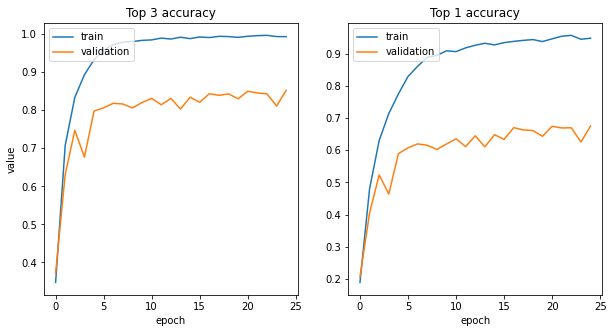

In [ ]:
transfer_model.train('full_finetune')

## Step 2_2: Finetuning by unfreezing all EfficientNetB0 layers

when mode is '6and7_finetune', the model which we trained in Step 1 again is loaded and only layers 6 and 7 of efficientnet are unfrozen, the rest are untouched as they were. and with a lower learning rate, training continues.

output of this function is like the first step

 Accuracy on test data so far is : 
252/252 [==============================] - 37s 136ms/step - loss: 3.2398 - accuracy: 0.3384 - top3_acc: 0.5591
Epoch 1/25
255/255 [==============================] - 56s 193ms/step - loss: 5.8067 - accuracy: 0.1497 - top3_acc: 0.2839 - val_loss: 4.5454 - val_accuracy: 0.1940 - val_top3_acc: 0.3514
Epoch 2/25
255/255 [==============================] - 33s 131ms/step - loss: 1.9733 - accuracy: 0.4754 - top3_acc: 0.7113 - val_loss: 2.9595 - val_accuracy: 0.3619 - val_top3_acc: 0.5752
Epoch 3/25
255/255 [==============================] - 33s 131ms/step - loss: 1.3592 - accuracy: 0.6177 - top3_acc: 0.8307 - val_loss: 2.5350 - val_accuracy: 0.4281 - val_top3_acc: 0.6514
Epoch 4/25
255/255 [==============================] - 33s 130ms/step - loss: 1.0432 - accuracy: 0.7065 - top3_acc: 0.8799 - val_loss: 1.9760 - val_accuracy: 0.5116 - val_top3_acc: 0.7308
Epoch 5/25
255/255 [==============================] - 33s 130ms/step - loss: 0.8488 - accuracy: 0.7455 - 

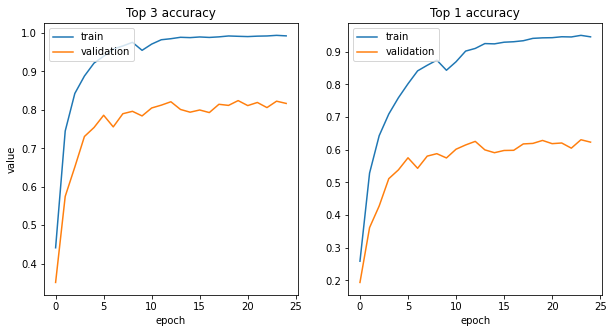

In [ ]:
transfer_model.train('6and7_finetune')